## FP4 European Funding Data

Data from https://open-data.europa.eu/en/data/dataset/cordisfp4projects

In [1]:
import pandas as pd

In [2]:
fp4 = pd.read_csv('FP4-data.csv')

In [3]:
fp4.head()

,id,title,acronym,subject,area,subject.1,start,end,duration,status,cost,framework,country,contractor
0,0,Spot IV-VΘgΘtation,NaN,Environmental Protection; Forecasting; Meteoro...,Research and development work for potential fu...,Environmental Protection; Forecasting; Meteoro...,1995-04-01,1997-07-31,NaN,Completed,NaN,Fourth Framework Programme,FR,NaN
1,1,Formation and occurrence of nitrous acd in the...,NaN,Environmental Protection; Forecasting; Measure...,Tropospheric physics and chemistry,Environmental Protection; Forecasting; Measure...,1996-02-01,1998-07-31,NaN,Completed,NaN,Fourth Framework Programme,IT,CH; DE; DE; DE; DE; DK; FR; GB; GR
2,2,Process for Production of Light Olefins by Deh...,NaN,Industrial Manufacture; Materials Technology,Materials engineering,Industrial Manufacture; Materials Technology,1996-01-01,1998-12-31,NaN,Completed,NaN,Fourth Framework Programme,FI,DE; FI; FR; FR
3,3,High resolution diode laser carbon dioxide env...,NaN,Environmental Protection; Measurement Methods;...,Troposphere,Environmental Protection; Measurement Methods;...,1996-04-01,1999-03-31,NaN,Completed,NaN,Fourth Framework Programme,IT,DE; IT
4,4,Subsurface Radar as a Tool for Non-destructive...,NaN,Industrial Manufacture; Materials Technology; ...,Reliability and quality of materials and products,Industrial Manufacture; Materials Technology; ...,1996-01-01,1998-12-31,NaN,Completed,NaN,Fourth Framework Programme,DE,DE; GB; GB; GB; IT; IT; NO


In [4]:
fp4.count()

id            14567
title         14567
acronym        5351
subject       14303
area          14297
subject.1     14303
start         13740
end           13676
duration       3846
status        14564
cost           3931
framework     14567
country       14389
contractor    10967
dtype: int64

## --> 14k records, but only ~4k have a cost -- let's focus on these

In [5]:
fp4sel = fp4[(fp4['cost'] > 0)]

# Exploratory Data Visualization

In [6]:
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np

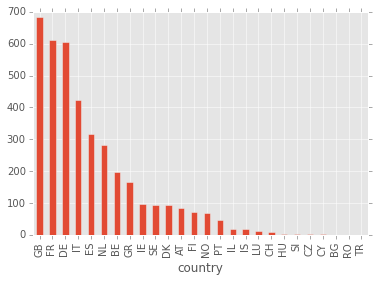

In [7]:
ProjectsByCountry = fp4sel.groupby('country').size().order(ascending=False)
ProjectsByCountry.plot(kind='bar');

## --> top 3 could have been guessed, decaying pattern
compare population: DE > FR > GB > IT > ES [wiki](http://en.wikipedia.org/wiki/List_of_European_countries_by_population)

## What about project duration?

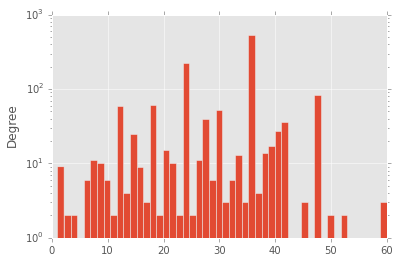

In [8]:
fp4sel['duration'].plot(kind='hist',log=True,bins=50);

## --> looks pretty random

## What about cost per project?

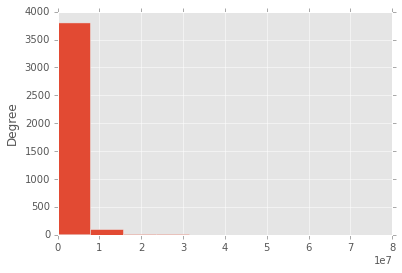

In [9]:
fp4sel['cost'].plot(kind='hist');

## --> mostly "cheap" projects
We will have a look at the cumulated costs later...

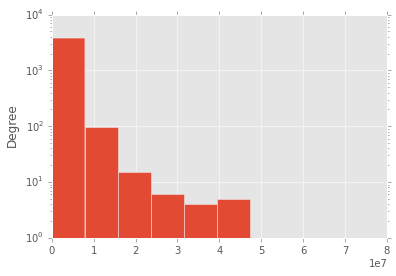

In [10]:
fp4sel['cost'].plot(kind='hist',log=True);

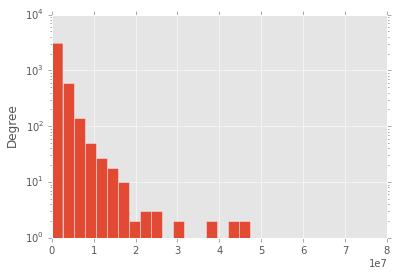

In [11]:
fp4sel['cost'].plot(kind='hist',log=True,bins=30);

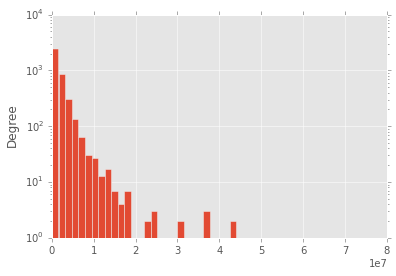

In [12]:
fp4sel['cost'].plot(kind='hist',log=True,bins=50);

## --> as usual: details of shape depend on binning

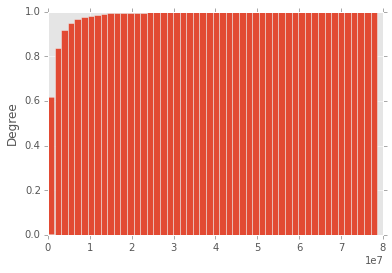

In [13]:
fp4sel['cost'].plot(kind='hist',bins=50,cumulative=True,normed=True);

## Can we see Pareto's 80/20 principle?

In [14]:
i = 0
for cumcost in fp4sel['cost'].order().cumsum():
    i += 1
    if ( cumcost >= 0.8 * fp4sel['cost'].sum() ):
        print(i * 100 / fp4sel['cost'].count())
        break

97.9357798165


In [15]:
0.02 * fp4sel['cost'].count()

78.480000000000004

In [16]:
fp4sel['cost'].order(ascending=False)[1:88].sum() * 100 / fp4sel['cost'].sum()

19.873098714596797

## --> 2 % of the projects account for 80% of the budget

## How much total funding is given to each country?

In [17]:
CostByCountry = fp4sel.groupby(['country']).agg({'cost': [np.size, np.sum]})
CostByCountry

cost            
        size         sum
country                 
AT        83   139652145
BE       197   426269187
BG         1      517000
CH         8    27389500
CY         2     1310000
CZ         2      202000
DE       605  1317023306
DK        94   176785035
ES       318   538240065
FI        73   154647404
FR       610  1457214214
GB       682  1236691486
GR       165   234650044
HU         3     1441650
IE        97   155967754
IL        19    17430985
IS        18    23983712
IT       424   820471083
LU        12    22144971
NL       282   566523880
NO        70   143962183
PT        48   103724285
RO         1      550000
SE        94   160906697
SI         3     1257000
TR         1     1084900

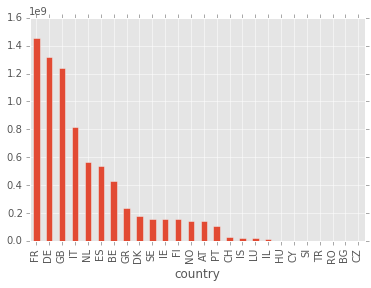

In [18]:
CostByCountry['cost','sum'].order(ascending=False).plot(kind='bar');

## --> again the largest countries receive most total funding
But they also had the most projects...so what about ratio?

In [19]:
CostByProjectAndCountry = CostByCountry['cost','sum']/CostByCountry['cost','size']

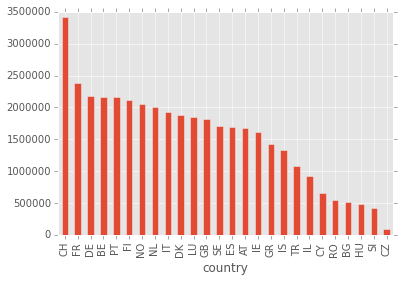

In [20]:
CostByProjectAndCountry.order(ascending=False).plot(kind='bar');

## --> Switzerland = No 1 ! (most funding per project)
GB with most funding and most projects only in the middle.

## Why?

In [21]:
fp4CH = fp4sel[fp4sel['country'] == 'CH']
fp4CH['cost'].count()

8

## --> only 8 projects in that period

In [22]:
fp4sel.sort(['cost'], ascending=[0]).head(31).tail(1)

,id,title,acronym,subject,area,subject.1,start,end,duration,status,cost,framework,country,contractor
183,183,Platform for engineering research and trials,EXPERT,"Electronics, Microelectronics; Information Pro...",High speed networking,"Electronics, Microelectronics; Information Pro...",1995-10-01,1998-03-31,30,Completed,15973000,Fourth Framework Programme,CH,BE; BE; BE; CH; CH; CH; CH; DE; DE; DE; DE; DK...


## --> 31th most expensive project (of the 4k considered)

In [23]:
fp4CH['cost'].sum()

27389500.0

In [24]:
100/fp4sel['cost'].sum() * fp4CH['cost'].sum() 

0.35388208639733626

### --> only ~0.3% of the total funding went to CH

# Conclusion: Black or White

The same data set can be (mis-)used to tell opposite stories.

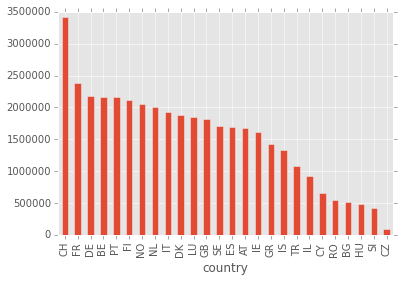

In [25]:
CostByProjectAndCountry.order(ascending=False).plot(kind='bar');

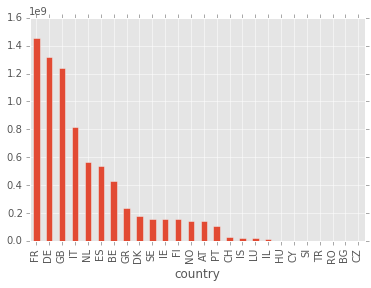

In [26]:
CostByCountry['cost','sum'].order(ascending=False).plot(kind='bar');